## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

## Load the Books

In [2]:
book_list = os.listdir("../dataset_02_personally_collected_data/data_before_processing")
book_list

['charles_dickens-great_expectations.txt',
 'charles_dickens-oliver_twist.txt',
 'charles_dickens-sketches_of_young_couples.txt',
 'charles_dickens-somebodys_luggage.txt',
 'charles_dickens-the_mystery_of_edwin_drood.txt',
 'f_scott_fitzgerald-the_beautiful_and_damned.txt',
 'f_scott_fitzgerald-the_great_gatsby.txt',
 'f_scott_fitzgerald-this_side_of_paradise.txt',
 'george_eliot-middlemarch.txt',
 'george_eliot-silas_marner.txt',
 'george_eliot-the_mill_on_the_floss.txt',
 'james_joyce-a_portrait_of_the_artist_as_a_young_man.txt',
 'james_joyce-dubliners.txt',
 'james_joyce-ulysses.txt',
 'jane_austen-emma.txt',
 'jane_austen-pride_and_prejudice.txt',
 'jane_austen-sense_and_sensibility.txt',
 'joseph_conrad-heart_of_darkness.txt',
 'joseph_conrad-lord_jim.txt',
 'joseph_conrad-the_rover.txt',
 'mark_twain-adventures_of_huckleberry_finn.txt',
 'mark_twain-the_adventures_of_tom_sawyer_part_1.txt',
 'mark_twain-the_adventures_of_tom_sawyer_part_2.txt',
 'mark_twain-the_adventures_of_tom

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Creating Book Dataframe

In [4]:
import os
import pandas as pd

def parse_filename(filename):
    """
    Parse the filename to extract the author and book name.
    Assumes filename format is 'name-of-author_book-name.txt'
    """
    # Remove the file extension and split by the first underscore
    author, book_name = filename[:-4].split('-', 1)
    # Replace hyphens with spaces for author and book name
    author = author.replace('_', ' ')
    book_name = book_name.replace('_', ' ')
    return book_name, author

def process_files_for_metadata(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            book_name, author = parse_filename(filename)
            data.append({'Book Name': book_name, 'Author': author})
    return data

def create_metadata_dataframe(data):
    """
    Create a dataframe from the provided metadata list
    """
    return pd.DataFrame(data)

# Change 'your-directory-path' to the path of the directory containing your txt files
directory_path = '../dataset_02_personally_collected_data/data_before_processing'
metadata = process_files_for_metadata(directory_path)
metadata_df = create_metadata_dataframe(metadata)
print(metadata_df.head())
# metadata_df.to_csv('../dataset_02_personally_collected_data/data_after_processing/books_df.csv', index=False)  # Save the dataframe to a CSV file


                    Book Name           Author
0          great expectations  charles dickens
1                oliver twist  charles dickens
2   sketches of young couples  charles dickens
3           somebodys luggage  charles dickens
4  the mystery of edwin drood  charles dickens


### Creating Sentence Dataframe

In [5]:
import os
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

def extract_author(filename):
    """
    Extract the author's name from the filename.
    Assumes filename format is 'name-of-author_book-name.txt'
    """
    return filename.split('_')[0].replace('-', ' ')

def process_files(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            author = extract_author(filename)
            path = os.path.join(directory, filename)
            with open(path, 'r', encoding='utf-8') as file:
                text = file.read()
                sentences = sent_tokenize(text)
                for sentence in sentences:
                    data.append({'Text': sentence, 'Label': author})
    return data

def create_dataframe(data):
    """
    Create a dataframe from the provided data list
    """
    return pd.DataFrame(data)

# Change 'your-directory-path' to the path of the directory containing your txt files
directory_path = '../dataset_02_personally_collected_data/data_before_processing'
data = process_files(directory_path)
df = create_dataframe(data)
print(df.head())
# df.to_csv('output_full_sentences.csv', index=False)  # Save the dataframe to a CSV file


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                Text    Label
0                                        ﻿Chapter I.  charles
1  My father’s family name being Pirrip, and my C...  charles
2  So, I called myself Pip, and came to be called...  charles
3  I give Pirrip as my father’s family name, on t...  charles
4           Joe Gargery, who married the blacksmith.  charles


In [6]:
# import os
# import re
# import pandas as pd
# import nltk
# from nltk.tokenize import sent_tokenize

# nltk.download('punkt')

# def extract_author(filename):
#     """
#     Extract the author's name from the filename.
#     Assumes filename format is 'name-of-author_book-name.txt'
#     """
#     return filename.split('_')[0].replace('-', ' ')

# def process_files(directory):
#     data = []
#     for filename in os.listdir(directory):
#         if filename.endswith('.txt'):
#             author = extract_author(filename)
#             path = os.path.join(directory, filename)
#             with open(path, 'r', encoding='utf-8') as file:
#                 text = file.read()
#                 sentences = sent_tokenize(text)
#                 if len(sentences) > 1000:
#                     sampled_sentences = sentences[:1000]
#                 else:
#                     sampled_sentences = sentences
#                 for sentence in sampled_sentences:
#                     data.append({'Text': sentence, 'Label': author})
#     return data

# def create_dataframe(data):
#     """
#     Create a dataframe from the provided data list
#     """
#     return pd.DataFrame(data)

# # Change 'your-directory-path' to the path of the directory containing your txt files
# directory_path = '../dataset_02_personally_collected_data/data_before_processing'
# data = process_files(directory_path)
# df = create_dataframe(data)
# print(df.head())


In [7]:
#checking first sentences
df["Text"][1]

'My father’s family name being Pirrip, and my Christian name Philip, my\ninfant tongue could make of both names nothing longer or more explicit\nthan Pip.'

In [8]:
df["Label"].unique()

array(['charles', 'f', 'george', 'james', 'jane', 'joseph', 'mark',
       'oscar', 'virginia', 'william'], dtype=object)

In [9]:
# df.to_csv('../dataset_02_personally_collected_data/data_after_processing/', index=False)  # Save the dataframe to a CSV file

In [10]:
df

,Text,Label
0,﻿Chapter I.,charles
1,"My father’s family name being Pirrip, and my C...",charles
2,"So, I called myself Pip, and came to be called...",charles
3,"I give Pirrip as my father’s family name, on t...",charles
4,"Joe Gargery, who married the blacksmith.",charles
...,...,...
167411,"Well, I will muse no further.—Master Fenton,\n...",william
167412,"Good husband, let us every one go home,\nAnd l...",william
167413,FORD.,william
167414,"Let it be so, Sir John,\nTo Master Brook you y...",william


In [11]:
# df["cleaned_text"] = df["Text"].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' ').replace('act','').replace('chapter','').replace('prologue','').replace('scene',''))
# df

In [12]:
#removing the chapter/act/prologue rows
pattern = r'\b(ACT|CHAPTER|Chapter|Act|Scene|SCENE)\s+[IVXLCDM]+'

# Filter rows that match the pattern
filtered_df = df[~df['Text'].str.contains(pattern, case=True, na=False, regex=True)]

C:\Users\MSI\AppData\Local\Temp\ipykernel_17452\901160743.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = df[~df['Text'].str.contains(pattern, case=True, na=False, regex=True)]


In [13]:
filtered_df

,Text,Label
1,"My father’s family name being Pirrip, and my C...",charles
2,"So, I called myself Pip, and came to be called...",charles
3,"I give Pirrip as my father’s family name, on t...",charles
4,"Joe Gargery, who married the blacksmith.",charles
5,"As I never saw my father or my mother, and nev...",charles
...,...,...
167411,"Well, I will muse no further.—Master Fenton,\n...",william
167412,"Good husband, let us every one go home,\nAnd l...",william
167413,FORD.,william
167414,"Let it be so, Sir John,\nTo Master Brook you y...",william


In [14]:
filtered_df.to_csv("output_full_sentence.csv", index = False)

In [15]:
filtered_df["Label"].value_counts()

Label
james       32776
george      20550
charles     18961
virginia    17824
f           15978
joseph      15192
jane        14309
oscar       12314
mark        12070
william      6726
Name: count, dtype: int64

In [16]:
# filtered_df.to_csv("filtered_df.csv", index=False)

In [17]:
filtered_df = df[(df['Text'].str.len() >= 40) & (df['Text'].str.len() <= 90)]
filtered_df

,Text,Label
2,"So, I called myself Pip, and came to be called...",charles
4,"Joe Gargery, who married the blacksmith.",charles
14,"A man\nwith no hat, and with broken shoes, and...",charles
17,"Don’t cut my throat, sir,” I pleaded in terror.",charles
18,"“Pray don’t do it,\nsir.”\n\n“Tell us your nam...",charles
...,...,...
167400,"In love, the heavens themselves do guide the s...",william
167401,"Money buys lands, and wives are sold by fate.",william
167407,What cannot be eschewed must be embraced.,william
167409,"When night-dogs run, all sorts of deer are cha...",william


In [18]:
filtered_df["Label"].value_counts()

Label
james       9420
virginia    5569
f           4880
george      4858
charles     4795
joseph      4314
mark        3823
oscar       3769
jane        3711
william     1592
Name: count, dtype: int64

### Balancing the dataset

In [19]:
# Determine the minimum count to downsample to
min_count = filtered_df['Label'].value_counts().min()

# Downsample each group
balanced_df = filtered_df.groupby('Label').sample(n=min_count, random_state=42)
balanced_df["Label"].value_counts()

Label
charles     1592
f           1592
george      1592
james       1592
jane        1592
joseph      1592
mark        1592
oscar       1592
virginia    1592
william     1592
Name: count, dtype: int64

In [20]:
balanced_df["cleaned_text"] = balanced_df["Text"].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))

In [21]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder=LabelEncoder()
# y= label_encoder.fit_transform(balanced_df['Label'])
# balanced_df['Label']=y
# balanced_df

In [22]:
balanced_df

,Text,Label,cleaned_text
2412,"“Go and wait outside, Mike,” said the clerk.",charles,"“go and wait outside, mike,” said the clerk."
3885,"I am to have a carriage,\nand you are to take me.",charles,"i am to have a carriage, and you are to take me."
7095,"A\ngate in the fence standing ajar, I pushed i...",charles,"a gate in the fence standing ajar, i pushed it..."
3011,“Not yet.”\n\n“He told me so this afternoon wh...,charles,“not yet.” “he told me so this afternoon when...
7777,"“No, no,” said Mrs. Sowerberry: bethinking her...",charles,"“no, no,” said mrs. sowerberry: bethinking her..."
...,...,...,...
161243,But I hope your Lordshippe thinkes not him a\n...,william,but i hope your lordshippe thinkes not him a s...
163821,Let grief\nConvert to anger; blunt not the hea...,william,let grief convert to anger; blunt not the hear...
165040,"[_They retire._]\n\nEnter Ford with Pistol, an...",william,"[_they retire._] enter ford with pistol, and ..."
164509,"But if you say “Marry her,” I\nwill marry her.",william,"but if you say “marry her,” i will marry her."


In [23]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

s:\Anaconda\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
import spacy
import string
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'about', 'more', 'because', 'say', 'show', 'if', 'for', 'really', 'put', 'other', 'doing', 'side', 'five', 'top', 'along', '‘ve', 'those', 'twenty', 'see', 'him', 'one', 'she', 'six', 'within', 'not', "'ll", 'same', 'already', 'whose', 'most', 'fifteen', 'an', 'their', 'bottom', 'therefore', 'somehow', 'both', 'without', 'until', 'whole', 'last', "'d", 'through', 'nothing', 'since', 'her', 'always', 'sometime', 'again', 'you', 'n‘t', 'to', 'each', 'front', 'them', 'why', '’m', 'these', 'a', 'quite', 'below', 'serious', 'fifty', 'via', 'eight', 'various', 'wherein', "'re", 'indeed', 'while', 'anywhere', 'amount', 'are', 'behind', 'when', 'thereupon', 'be', 'take', 'please', 'ten', 'from', 'nobody', 'during', 'others', 'has', 'together', 'still', 'above', 'next', 'do', 'hence', 'else', 'its', 'nevertheless', 'there', 'except', 'it', 'am', 'alone', '’s', 'any', 'empty', 'another', 'further', 'thereafter', '’ve', 'been', 'even', 'many', 'with', 'off', 'only', 'beside', 'hundred', 'latter'

In [25]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [26]:
#creating the tokenizer function
def spacy_tokenizer(sentence):
    #creating our token object
    doc = nlp(sentence)
    #Lemmetizing each token and converting into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc]
    #removing stopwords
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]
    sentence = " ".join(mytokens)
    return sentence
    

In [27]:
balanced_df["tokenized"] = balanced_df["Text"].apply(spacy_tokenizer)
balanced_df["embeddings"] = balanced_df["cleaned_text"].apply(model.encode)
balanced_df["tok_embeddings"] = balanced_df["tokenized"].apply(model.encode)
balanced_df

,Text,Label,cleaned_text,tokenized,embeddings,tok_embeddings
2412,"“Go and wait outside, Mike,” said the clerk.",charles,"“go and wait outside, mike,” said the clerk.",wait outside mike clerk,"[-0.0112552745, 0.11768123, 0.02685256, 0.0025...","[-0.04254677, 0.026347809, -0.0019364373, -0.0..."
3885,"I am to have a carriage,\nand you are to take me.",charles,"i am to have a carriage, and you are to take me.",carriage,"[-0.03333671, 0.006971098, 0.012888104, 0.0694...","[-0.035824973, 0.010239771, -0.0042379806, 0.0..."
7095,"A\ngate in the fence standing ajar, I pushed i...",charles,"a gate in the fence standing ajar, i pushed it...",gate fence standing ajar push open,"[0.032270703, 0.09190436, -0.071354255, 0.0216...","[-0.007935883, 0.020252706, -0.0811523, -0.003..."
3011,“Not yet.”\n\n“He told me so this afternoon wh...,charles,“not yet.” “he told me so this afternoon when...,tell afternoon hear come,"[0.030299107, 0.032669853, 0.030670226, 0.0308...","[0.0021094067, 0.04369643, 0.06633692, -0.0075..."
7777,"“No, no,” said Mrs. Sowerberry: bethinking her...",charles,"“no, no,” said mrs. sowerberry: bethinking her...",mrs. sowerberry bethink oliver old friend,"[0.017911268, -0.01562703, -0.048421293, 0.055...","[-0.027540512, -0.026170421, -0.06805167, 0.05..."
...,...,...,...,...,...,...
161243,But I hope your Lordshippe thinkes not him a\n...,william,but i hope your lordshippe thinkes not him a s...,hope lordshippe think souldi ber,"[-0.0031233232, 0.054218266, -0.010900511, -0....","[-0.028840544, 0.013971108, -0.015554212, -0.1..."
163821,Let grief\nConvert to anger; blunt not the hea...,william,let grief convert to anger; blunt not the hear...,let grief convert anger blunt heart enrage,"[0.02307417, 0.026406916, 0.015988698, -0.0030...","[-0.005789178, 0.039669693, 0.0003173755, -0.0..."
165040,"[_They retire._]\n\nEnter Ford with Pistol, an...",william,"[_they retire._] enter ford with pistol, and ...",retire enter ford pistol page nym,"[0.035135973, -0.009606386, -0.006784338, 0.00...","[-0.010431407, -4.908554e-05, -0.07069267, 0.0..."
164509,"But if you say “Marry her,” I\nwill marry her.",william,"but if you say “marry her,” i will marry her.",marry marry,"[-0.018016865, 0.06648926, 0.06013225, -0.0562...","[-0.0069794604, 0.108915254, 0.03326017, 0.046..."


In [22]:
# balanced_df.to_csv("balanced_tokenized_embedded_df.csv",index=False)

<Axes: xlabel='Label', ylabel='count'>

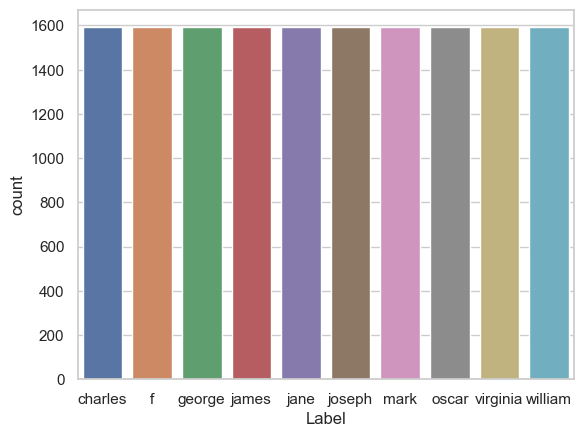

In [28]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(x=balanced_df["Label"])
     

s:\Anaconda\envs\ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Distribution of text length for text.')

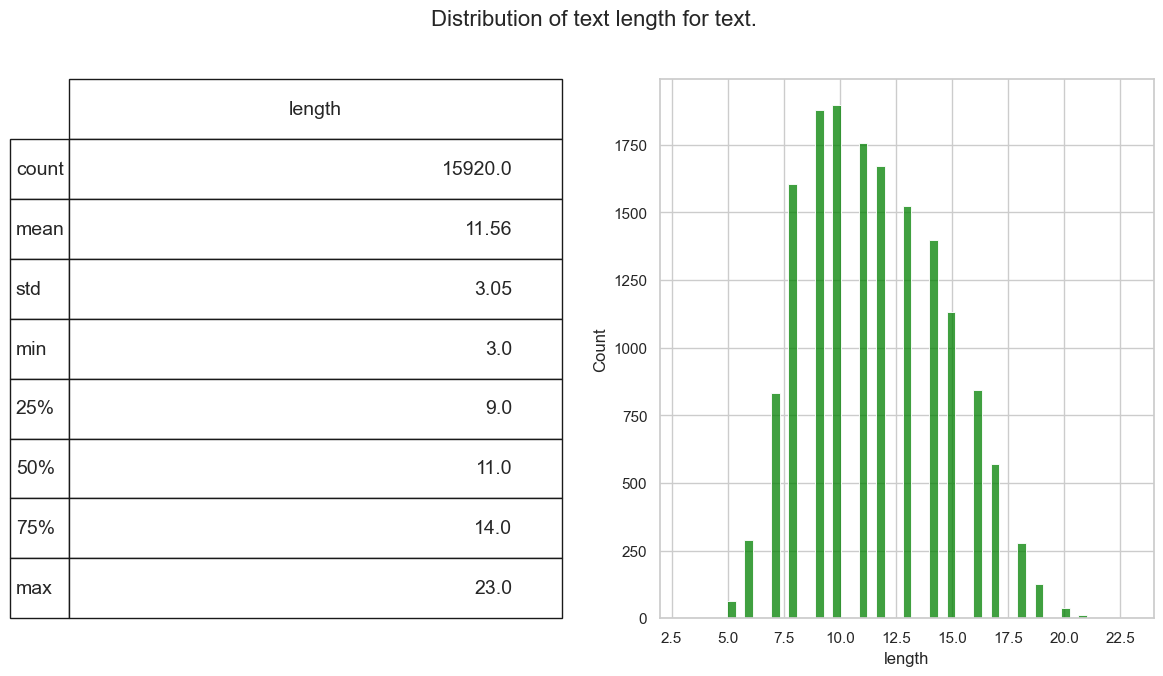

In [29]:
fig = plt.figure(figsize=(14,7))
balanced_df['length'] = balanced_df.cleaned_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(balanced_df['length'], ax=ax1,color='green')
describe = balanced_df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)


In [30]:
x_train, x_test, y_train, y_test = train_test_split(balanced_df["cleaned_text"],balanced_df["Label"], test_size = 0.2, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(12736, 84107) (3184, 84107) (12736,) (3184,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score

lr = LogisticRegression(C = 10, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="linear",degree=10)
svc.fit(x_train_tfidf, y_train)
y_pred1 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

In [38]:
x_train, x_test, y_train, y_test = train_test_split(balanced_df["tokenized"],balanced_df["Label"], test_size = 0.2, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(12736, 51255) (3184, 51255) (12736,) (3184,)


## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score

lr = LogisticRegression(C = 10, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.48586683417085424
              precision    recall  f1-score   support

     charles       0.45      0.48      0.46       307
           f       0.43      0.41      0.42       302
      george       0.49      0.43      0.46       332
       james       0.49      0.37      0.42       342
        jane       0.55      0.52      0.53       320
      joseph       0.37      0.45      0.40       324
        mark       0.51      0.54      0.52       341
       oscar       0.47      0.49      0.48       307
    virginia       0.41      0.46      0.43       291
     william       0.71      0.72      0.71       318

    accuracy                           0.49      3184
   macro avg       0.49      0.49      0.49      3184
weighted avg       0.49      0.49      0.49      3184



In [40]:
from sklearn.svm import SVC

svc = SVC(kernel="linear",degree=10)
svc.fit(x_train_tfidf, y_train)
y_pred1 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.4751884422110553
              precision    recall  f1-score   support

     charles       0.42      0.46      0.44       307
           f       0.42      0.40      0.41       302
      george       0.47      0.44      0.46       332
       james       0.47      0.37      0.42       342
        jane       0.55      0.50      0.53       320
      joseph       0.35      0.43      0.39       324
        mark       0.53      0.52      0.53       341
       oscar       0.43      0.47      0.45       307
    virginia       0.41      0.44      0.42       291
     william       0.71      0.71      0.71       318

    accuracy                           0.48      3184
   macro avg       0.48      0.48      0.48      3184
weighted avg       0.48      0.48      0.48      3184



In [31]:
# X = balanced_df["tok_embeddings"].to_list()
# y = balanced_df["Label"].to_list()


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
# y_train

['jane',
 'james',
 'george',
 'joseph',
 'george',
 'f',
 'joseph',
 'mark',
 'oscar',
 'george',
 'mark',
 'mark',
 'mark',
 'joseph',
 'james',
 'george',
 'james',
 'joseph',
 'virginia',
 'george',
 'oscar',
 'mark',
 'william',
 'f',
 'joseph',
 'charles',
 'james',
 'virginia',
 'james',
 'charles',
 'william',
 'charles',
 'oscar',
 'oscar',
 'oscar',
 'mark',
 'jane',
 'joseph',
 'mark',
 'f',
 'george',
 'oscar',
 'jane',
 'william',
 'joseph',
 'charles',
 'virginia',
 'oscar',
 'virginia',
 'virginia',
 'f',
 'james',
 'mark',
 'f',
 'jane',
 'jane',
 'george',
 'f',
 'joseph',
 'mark',
 'james',
 'jane',
 'joseph',
 'virginia',
 'f',
 'george',
 'george',
 'f',
 'f',
 'jane',
 'william',
 'william',
 'oscar',
 'charles',
 'mark',
 'jane',
 'mark',
 'george',
 'william',
 'joseph',
 'william',
 'oscar',
 'george',
 'jane',
 'james',
 'william',
 'f',
 'virginia',
 'george',
 'oscar',
 'virginia',
 'virginia',
 'mark',
 'william',
 'mark',
 'william',
 'virginia',
 'william'

In [36]:
# from sklearn.svm import SVC
# model = SVC()
# model.fit(X_train, y_train)

SVC()

In [37]:
# from sklearn import metrics
# predicted = model.predict(X_test)
# print("Accuracy: ", metrics.accuracy_score(y_test,predicted))

Accuracy:  0.4060929648241206


In [40]:
# for i in range(1,100):
#     model = SVC(kernel="poly", degree=i, C=100)
#     model.fit(X_train, y_train)
#     print("Accuracy on Testing Data: \t",model.score(X_test,y_test))
#     print("Accuracy on Training Data: \t",model.score(X_train,y_train))

In [42]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.1,1,100,1000],
#     'kernel': ['rbf','poly','linear','sigmoid'],
#     'degree': [1,2,3,4,5,6]   
# }

# grid = GridSearchCV(SVC(),param_grid)
# grid.fit(X_train, y_train)

In [43]:
# print(grid.best_params_)
# print(grid.score(X_test, y_test))